# NSE Stocks Data

**Daily data of National Stock Exchange of India for all series.** <br>

A brief description of columns.<br>
**SYMBOL**: Symbol of the listed company. <br>
**SERIES**: Series of the equity. Values are [EQ, BE, BL, BT, GC and IL] <br>
**OPEN**: The opening market price of the equity symbol on the date. <br>
**HIGH**: The highest market price of the equity symbol on the date. <br>
**LOW**: The lowest recorded market price of the equity symbol on the date. <br>
**CLOSE**: The closing recorded price of the equity symbol on the date. <br>
**LAST**: The last traded price of the equity symbol on the date. <br>
**PREVCLOSE**: The previous day closing price of the equity symbol on the date. <br>
**TOTTRDQTY**: Total traded quantity of the equity symbol on the date. <br>
**TOTTRDVAL**: Total traded volume of the equity symbol on the date. <br>
**TIMESTAMP**: Date of record. <br>
**TOTALTRADES**: Total trades executed on the day. <br>
**ISIN**: International Securities Identification Number. <br>

In [103]:
#import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
#Load Data
data=pd.read_csv('FINAL_FROM_DF.csv')
data.head()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,20MICRONS,EQ,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,2017-06-28,202,INE144J01027
1,3IINFOTECH,EQ,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,2017-06-28,7353,INE748C01020
2,3MINDIA,EQ,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,2017-06-28,748,INE470A01017
3,63MOONS,EQ,61.00,61.90,60.35,61.00,61.10,60.65,27701,1689421.00,2017-06-28,437,INE111B01023
4,8KMILES,EQ,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,2017-06-28,1866,INE650K01021


## Analysing & Preprocessing

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846404 entries, 0 to 846403
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SYMBOL       846404 non-null  object 
 1   SERIES       843947 non-null  object 
 2   OPEN         846404 non-null  float64
 3   HIGH         846404 non-null  float64
 4   LOW          846404 non-null  float64
 5   CLOSE        846404 non-null  float64
 6   LAST         846404 non-null  float64
 7   PREVCLOSE    846404 non-null  float64
 8   TOTTRDQTY    846404 non-null  int64  
 9   TOTTRDVAL    846404 non-null  float64
 10  TIMESTAMP    846404 non-null  object 
 11  TOTALTRADES  846404 non-null  int64  
 12  ISIN         846404 non-null  object 
dtypes: float64(7), int64(2), object(4)
memory usage: 83.9+ MB


In [106]:
data.describe()

,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES
count,846404.000000,846404.000000,846404.000000,846404.000000,846404.000000,846404.000000,8.464040e+05,8.464040e+05,8.464040e+05
mean,561.258797,568.679340,553.861861,560.815168,560.184430,560.225320,6.983800e+05,1.334592e+08,5.013823e+03
std,2005.760598,2027.159199,1983.412783,2004.576315,2003.900793,2000.362761,4.055630e+06,6.296968e+08,1.490112e+04
min,0.050000,0.050000,0.050000,0.050000,0.000000,0.050000,1.000000e+00,5.000000e-02,1.000000e+00
25%,39.900000,40.850000,38.850000,39.750000,39.600000,39.700000,6.628000e+03,6.071941e+05,8.400000e+01
50%,139.200000,142.050000,136.150000,138.900000,138.450000,138.750000,4.429200e+04,5.321067e+06,6.000000e+02
75%,490.000000,499.550000,481.100000,489.550000,488.500000,489.150000,2.757322e+05,3.711093e+07,3.028000e+03
max,119990.000000,119990.000000,119990.000000,119990.000000,119990.000000,119990.000000,7.818365e+08,1.426400e+11,1.192900e+06


In [107]:
stock_data = data[data['SYMBOL'] == '3IINFOTECH'].copy()
stock_data['TIMESTAMP'] = pd.to_datetime(stock_data['TIMESTAMP'])
stock_data.sort_values(by='TIMESTAMP', inplace=True)

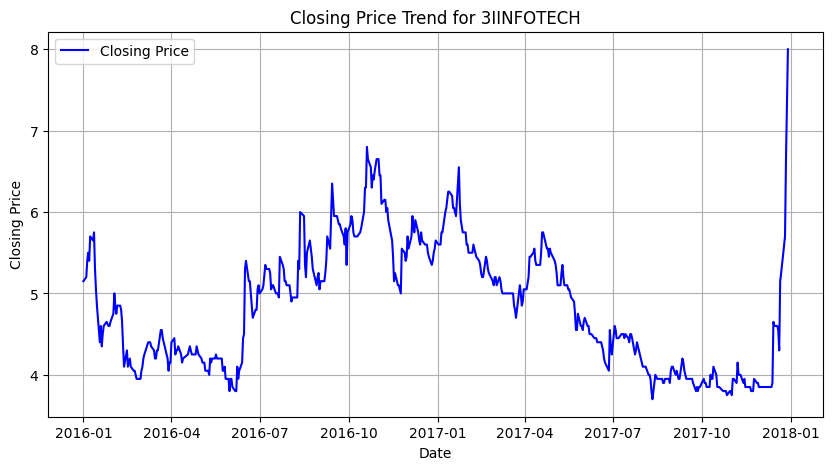

In [108]:
plt.figure(figsize=(10, 5))
plt.plot(stock_data['TIMESTAMP'], stock_data['CLOSE'], label='Closing Price', color='blue')
plt.title('Closing Price Trend for 3IINFOTECH')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()
plt.show()

In [109]:
prices = stock_data['CLOSE'].values.reshape(-1, 1)

###  Apply Scaling

In [110]:
close_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = close_scaler.fit_transform(stock_data[['CLOSE']])
#Using Other features
features = ['CLOSE', 'OPEN', 'HIGH', 'LOW']
scaled_features = scaler.fit_transform(stock_data[features])

### Sequences for LSTM

In [111]:
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_close)):
    X.append(scaled_features[i-sequence_length:i])  # Use features for input
    y.append(scaled_close[i, 0])  # Use 'CLOSE' as the target


X, y = np.array(X), np.array(y)

### Split the Data

In [112]:
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

 ### Create LSTM model

In [114]:
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [115]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error')

In [116]:
# Train the model with learning rate scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[lr_scheduler], verbose=1)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 631ms/step - loss: 0.5848 - val_loss: 0.4904 - learning_rate: 0.0010
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 371ms/step - loss: 0.4559 - val_loss: 0.3949 - learning_rate: 0.0010
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 533ms/step - loss: 0.3658 - val_loss: 0.3148 - learning_rate: 0.0010
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 374ms/step - loss: 0.2887 - val_loss: 0.2505 - learning_rate: 0.0010
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 461ms/step - loss: 0.2269 - val_loss: 0.1978 - learning_rate: 0.0010
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 478ms/step - loss: 0.1775 - val_loss: 0.1561 - learning_rate: 0.0010
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 491ms/step - loss: 0.1393 - val_loss: 0.1230 - learning_rate: 0.0010
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 377ms/step - loss: 0.1076 - val_loss: 0.0969 - learning_rate: 0.0010
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 619ms/step - loss: 0.0826 - val_loss: 0.0768 - learning_rate: 0.0010
Epoch 10

In [117]:
predicted_prices = model.predict(X_test)
predicted_prices = close_scaler.inverse_transform(predicted_prices.reshape(-1, 1))
actual_prices = close_scaler.inverse_transform(y_test.reshape(-1, 1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 450ms/step


### Evaluate the model

In [118]:
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)
r2 = r2_score(actual_prices, predicted_prices)

In [119]:
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MSE: 0.1427
RMSE: 0.3778
R²: 0.6998


### Actual Vs Predicted

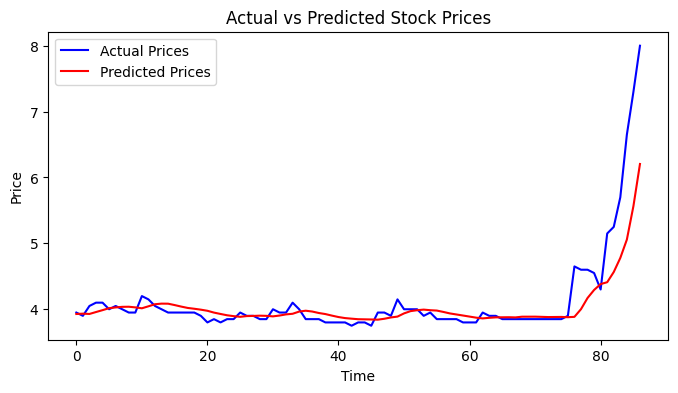

In [120]:
plt.figure(figsize=(8, 4))
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(predicted_prices, color='red', label='Predicted Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Prediction

In [121]:
future_sequence = scaled_features[-sequence_length:]  # Last 60 days
future_sequence = future_sequence.reshape(1, sequence_length,scaled_features.shape[1])
future_price = model.predict(future_sequence)
future_price = close_scaler.inverse_transform(future_price)

print(f"Predicted future price: {future_price[0, 0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted future price: 6.88
